# Import Packages

In [8]:
import os
import sys
import csv
import random
import platform
import subprocess

# Set Command

In [10]:
os_name = platform.system()
if os_name == "Darwin":
    HASHES_command = "./HASHES-macOS"
    HASHES_ResultFile = "HASHES_macOS.csv"
elif os_name == "Linux":
    HASHES_command = "./HASHES-Linux"
    HASHES_ResultFile = "HASHES_Linux.csv"
elif os_name == "Windows":
    HASHES_command = "HASHES-Windows.exe"
    HASHES_ResultFile = "HASHES_Windows.csv"
else:
    print("OS not supported")
    sys.exit(1)

if not os.path.exists(HASHES_command):
    print("Please compile the C++ code first")
    sys.exit(1)

print("HASHES command: ", HASHES_command)
print("HASHES Result File: ", HASHES_ResultFile)

HASHES command:  ./HASHES-macOS
HASHES Result File:  HASHES_macOS.csv


# Create Input Files

In [4]:
# Create directories
if not os.path.exists("./Container"):
    os.makedirs("./Container")
if not os.path.exists("./Container/Plain"):
    os.makedirs("./Container/Plain")
if not os.path.exists("./Container/Hashed"):
    os.makedirs("./Container/Hashed")
    
# Create a file with random data
def create_file(file_path, size_in_bytes):
    with open(file_path, 'wb') as f:
        random_bytes = bytearray(os.urandom(size_in_bytes))
        for i in range(size_in_bytes):
            random_bytes[i] = random.randint(65, 122)  # ASCII characters from space to tilde
        f.write(random_bytes)

# Create files with sizes from 1MB to 1GB
sizes = [1024*1024, 128*1024*1024, 256*1024*1024, 512*1024*1024, 1024*1024*1024]

for size in sizes:
    if size == 1024*1024*1024:
        FileName = "1GB.txt"
    else:
        FileName = f"{size // 1048576}MB.txt"
    FilePath = "./Container/Plain/" + FileName
    create_file(FilePath, size)
    print(f"File {FileName} created.")

File 1MB.txt created.
File 128MB.txt created.
File 256MB.txt created.
File 512MB.txt created.
File 1GB.txt created.


# Run HASHES Test

In [3]:
PlainDirectory = "./Container/Plain/"
HashedDirectory = "./Container/Hashed/"

# Hashes
Hashes = ["SHA_224", "SHA_256", "SHA_384", "SHA_512", "SHA3_224", "SHA3_256", "SHA3_384", "SHA3_512", "SHAKE128", "SHAKE256"]
InputFiles = ["1MB.txt", "128MB.txt", "256MB.txt", "512MB.txt", "1GB.txt"]
defaultloops = 200


def Hashes_Execution(Hash, File):
    HashCommand = f"{HASHES_command} {Hash} {PlainDirectory + File} {HashedDirectory + File}"
    process = subprocess.Popen(HashCommand, shell=True, stdout=subprocess.PIPE, stderr=subprocess.PIPE)
    output, error = process.communicate()
    HashTime = output.decode("utf-8")
    HashError = error.decode("utf-8")
    
    return HashTime, HashError

print("Start HASHES test...")
with open(HASHES_ResultFile, "w", newline='') as file:
    writer = csv.writer(file)
    writer.writerow(["Algorithm", "File", "Time"])
    
    for Hash in Hashes:
        for File in InputFiles:
            i = 0
            while i < defaultloops:
                HashTime, HashError = Hashes_Execution(Hash, File)
                if HashError:
                    print(f"Error: {HashError}")
                    sys.exit(1)
                writer.writerow([Hash, File, HashTime])
                i = i + 1
            print(f"Hash {Hash} for file {File} is completed.")
            
print("Successfully run HASHES test!")

Start HASHES test...
Hash SHA_224 for file 1MB.txt is completed.
Hash SHA_224 for file 128MB.txt is completed.
Hash SHA_224 for file 256MB.txt is completed.
Hash SHA_224 for file 512MB.txt is completed.
Hash SHA_224 for file 1GB.txt is completed.
Hash SHA_256 for file 1MB.txt is completed.
Hash SHA_256 for file 128MB.txt is completed.
Hash SHA_256 for file 256MB.txt is completed.
Hash SHA_256 for file 512MB.txt is completed.
Hash SHA_256 for file 1GB.txt is completed.
Hash SHA_384 for file 1MB.txt is completed.
Hash SHA_384 for file 128MB.txt is completed.
Hash SHA_384 for file 256MB.txt is completed.
Hash SHA_384 for file 512MB.txt is completed.
Hash SHA_384 for file 1GB.txt is completed.
Hash SHA_512 for file 1MB.txt is completed.
Hash SHA_512 for file 128MB.txt is completed.
Hash SHA_512 for file 256MB.txt is completed.
Hash SHA_512 for file 512MB.txt is completed.
Hash SHA_512 for file 1GB.txt is completed.
Hash SHA3_224 for file 1MB.txt is completed.
Hash SHA3_224 for file 128MB.t

# Compare the results of the different Algorithms

SHA_224 Results:
Algorithm      OS      File  Hashes_mean
  SHA_224   Linux   1MB.txt       19.545
  SHA_224   Linux 128MB.txt     2001.504
  SHA_224   Linux 256MB.txt     3604.652
  SHA_224   Linux 512MB.txt     7708.738
  SHA_224   Linux   1GB.txt    20529.077
  SHA_224   macOS   1MB.txt       10.210
  SHA_224   macOS 128MB.txt      685.581
  SHA_224   macOS 256MB.txt     1312.584
  SHA_224   macOS 512MB.txt     2558.079
  SHA_224   macOS   1GB.txt     5502.351
  SHA_224 Windows   1MB.txt       40.281
  SHA_224 Windows 128MB.txt     6975.308
  SHA_224 Windows 256MB.txt    12406.888
  SHA_224 Windows 512MB.txt    20552.470
  SHA_224 Windows   1GB.txt    48140.125



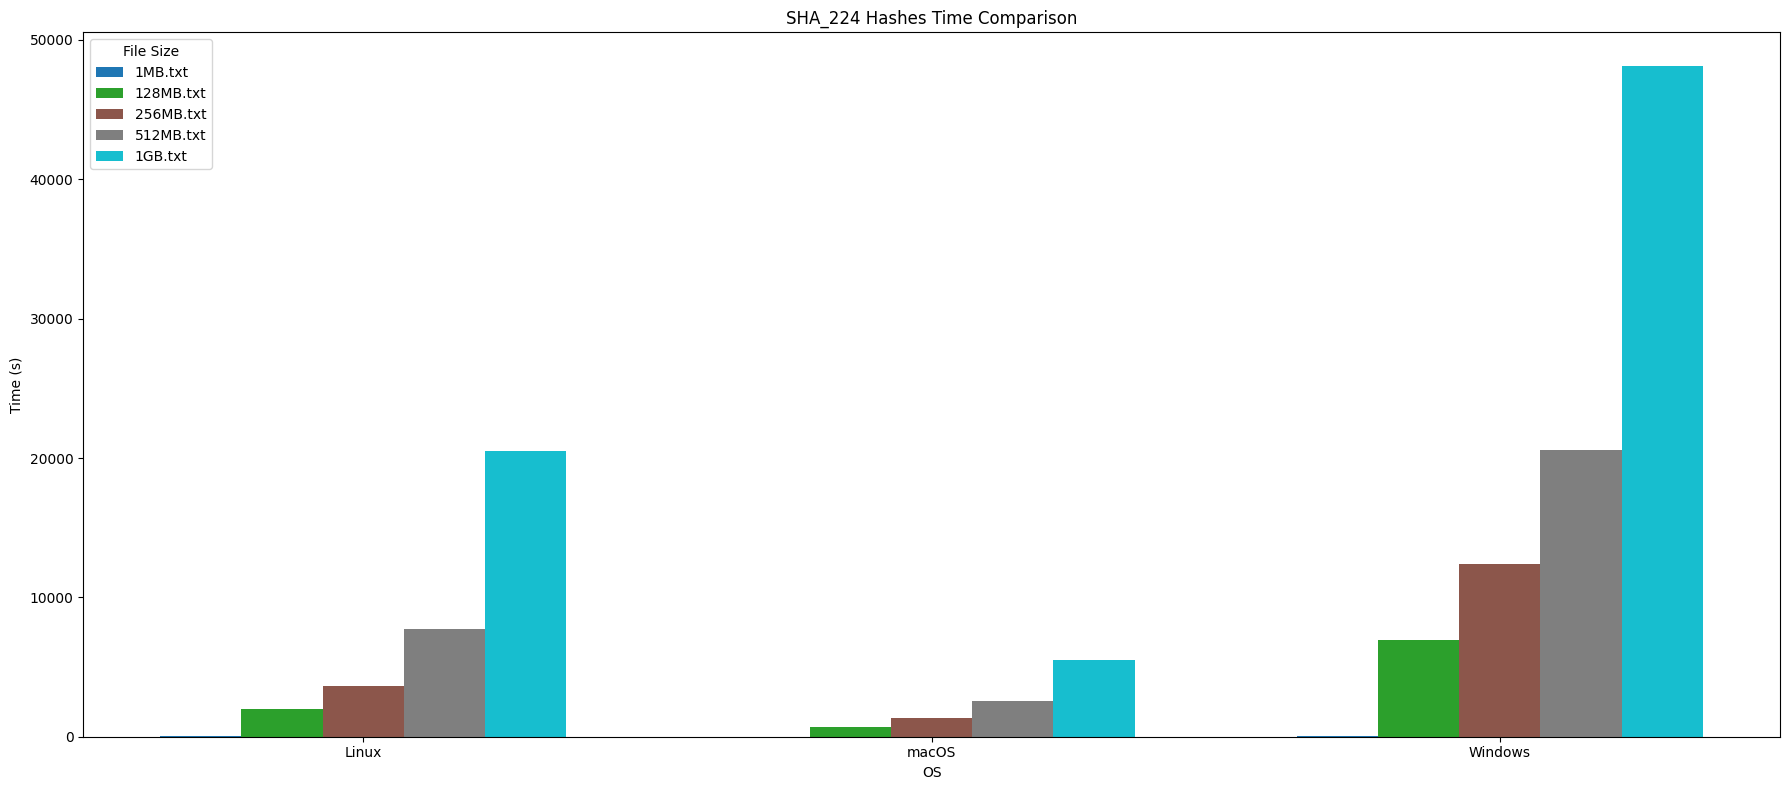

SHA_256 Results:
Algorithm      OS      File  Hashes_mean
  SHA_256   Linux   1MB.txt       12.618
  SHA_256   Linux 128MB.txt     1703.131
  SHA_256   Linux 256MB.txt     3486.865
  SHA_256   Linux 512MB.txt     7864.551
  SHA_256   Linux   1GB.txt    26487.313
  SHA_256   macOS   1MB.txt       15.546
  SHA_256   macOS 128MB.txt      597.229
  SHA_256   macOS 256MB.txt     1136.327
  SHA_256   macOS 512MB.txt     2581.946
  SHA_256   macOS   1GB.txt     5563.693
  SHA_256 Windows   1MB.txt       44.930
  SHA_256 Windows 128MB.txt     3667.596
  SHA_256 Windows 256MB.txt     8960.458
  SHA_256 Windows 512MB.txt    20700.544
  SHA_256 Windows   1GB.txt    43438.135



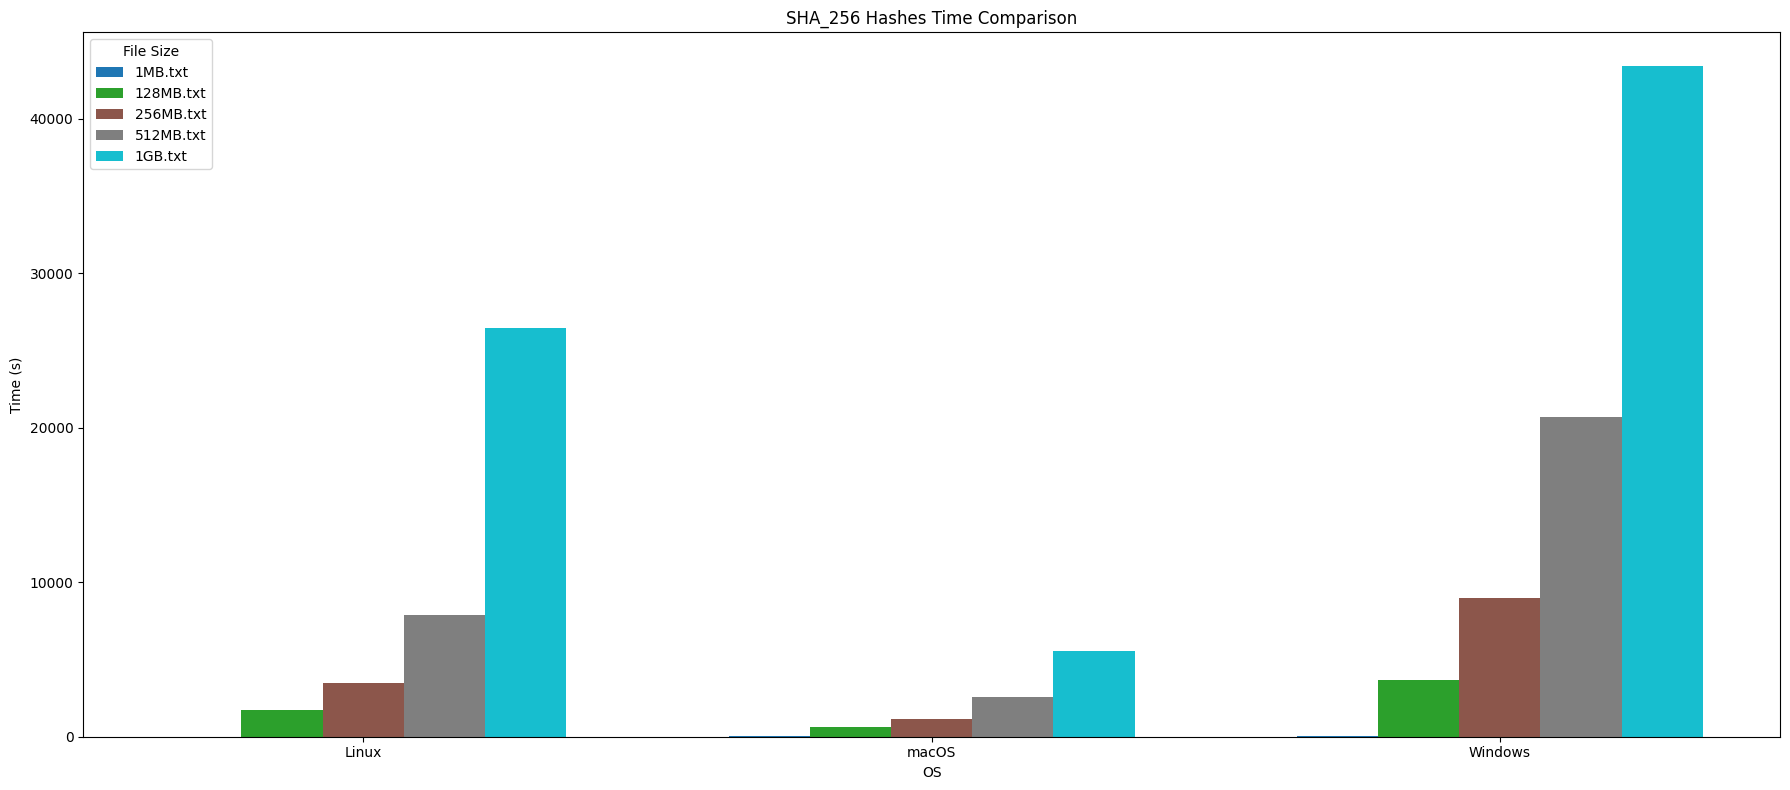

SHA_384 Results:
Algorithm      OS      File  Hashes_mean
  SHA_384   Linux   1MB.txt       18.936
  SHA_384   Linux 128MB.txt     2066.204
  SHA_384   Linux 256MB.txt     4036.093
  SHA_384   Linux 512MB.txt     9767.283
  SHA_384   Linux   1GB.txt    23964.939
  SHA_384   macOS   1MB.txt        8.676
  SHA_384   macOS 128MB.txt      782.069
  SHA_384   macOS 256MB.txt     1704.912
  SHA_384   macOS 512MB.txt     3413.875
  SHA_384   macOS   1GB.txt     7414.320
  SHA_384 Windows   1MB.txt      240.887
  SHA_384 Windows 128MB.txt     3097.685
  SHA_384 Windows 256MB.txt     8361.366
  SHA_384 Windows 512MB.txt    15840.299
  SHA_384 Windows   1GB.txt    35986.011



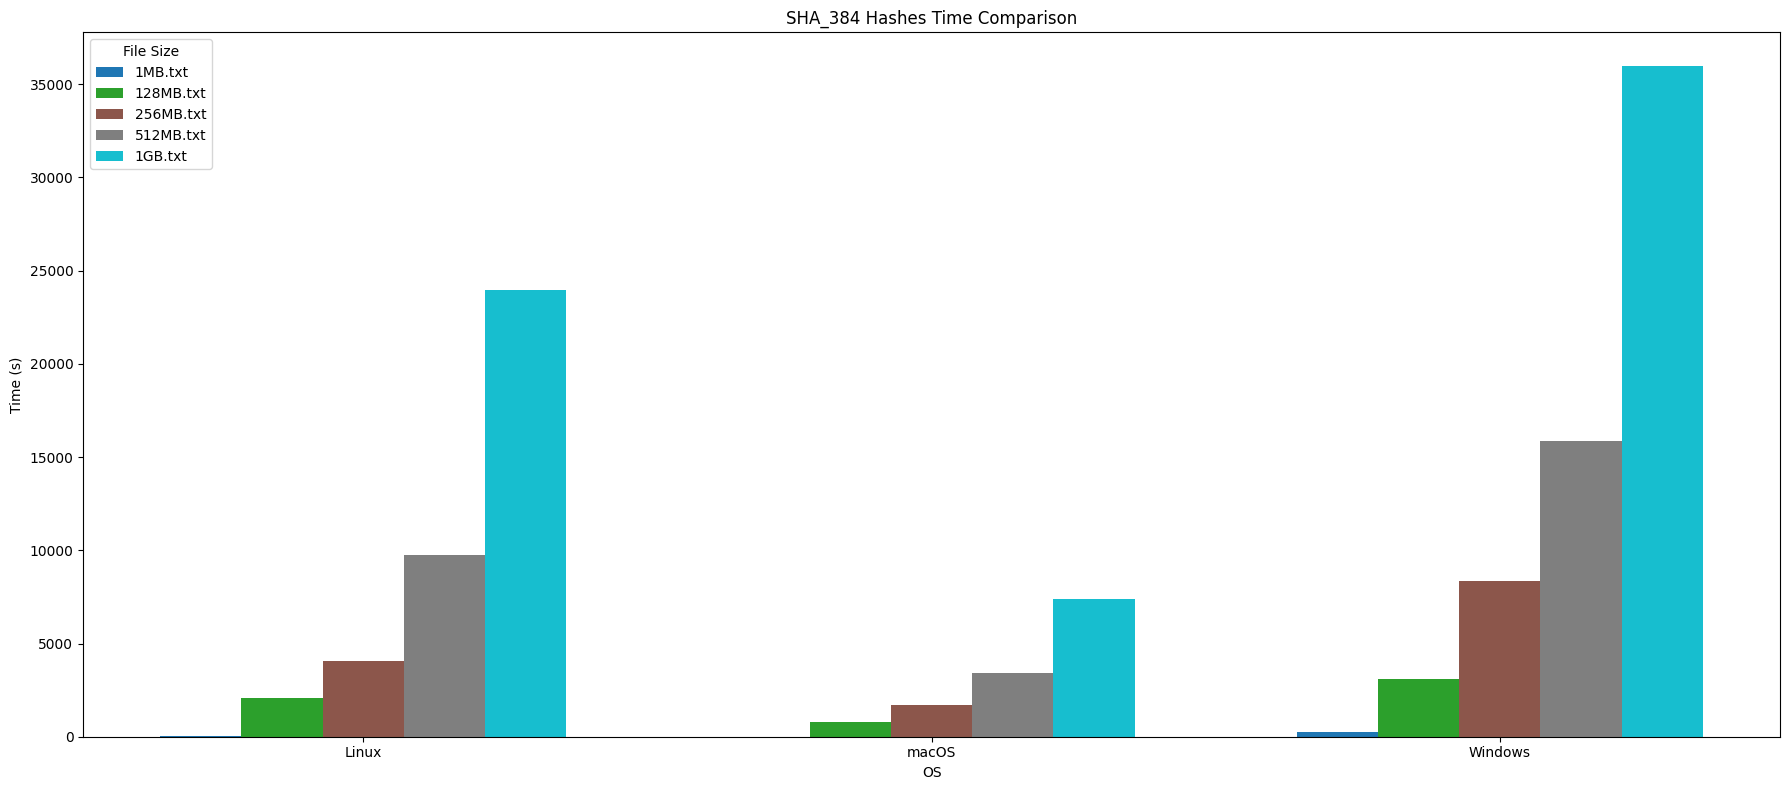

SHA_512 Results:
Algorithm      OS      File  Hashes_mean
  SHA_512   Linux   1MB.txt       16.496
  SHA_512   Linux 128MB.txt     1966.837
  SHA_512   Linux 256MB.txt     3706.772
  SHA_512   Linux 512MB.txt     8482.769
  SHA_512   Linux   1GB.txt    25223.064
  SHA_512   macOS   1MB.txt        8.711
  SHA_512   macOS 128MB.txt      778.326
  SHA_512   macOS 256MB.txt     1537.318
  SHA_512   macOS 512MB.txt     3222.195
  SHA_512   macOS   1GB.txt     7198.348
  SHA_512 Windows   1MB.txt       24.572
  SHA_512 Windows 128MB.txt     2625.058
  SHA_512 Windows 256MB.txt     8364.163
  SHA_512 Windows 512MB.txt    17152.380
  SHA_512 Windows   1GB.txt    47359.577



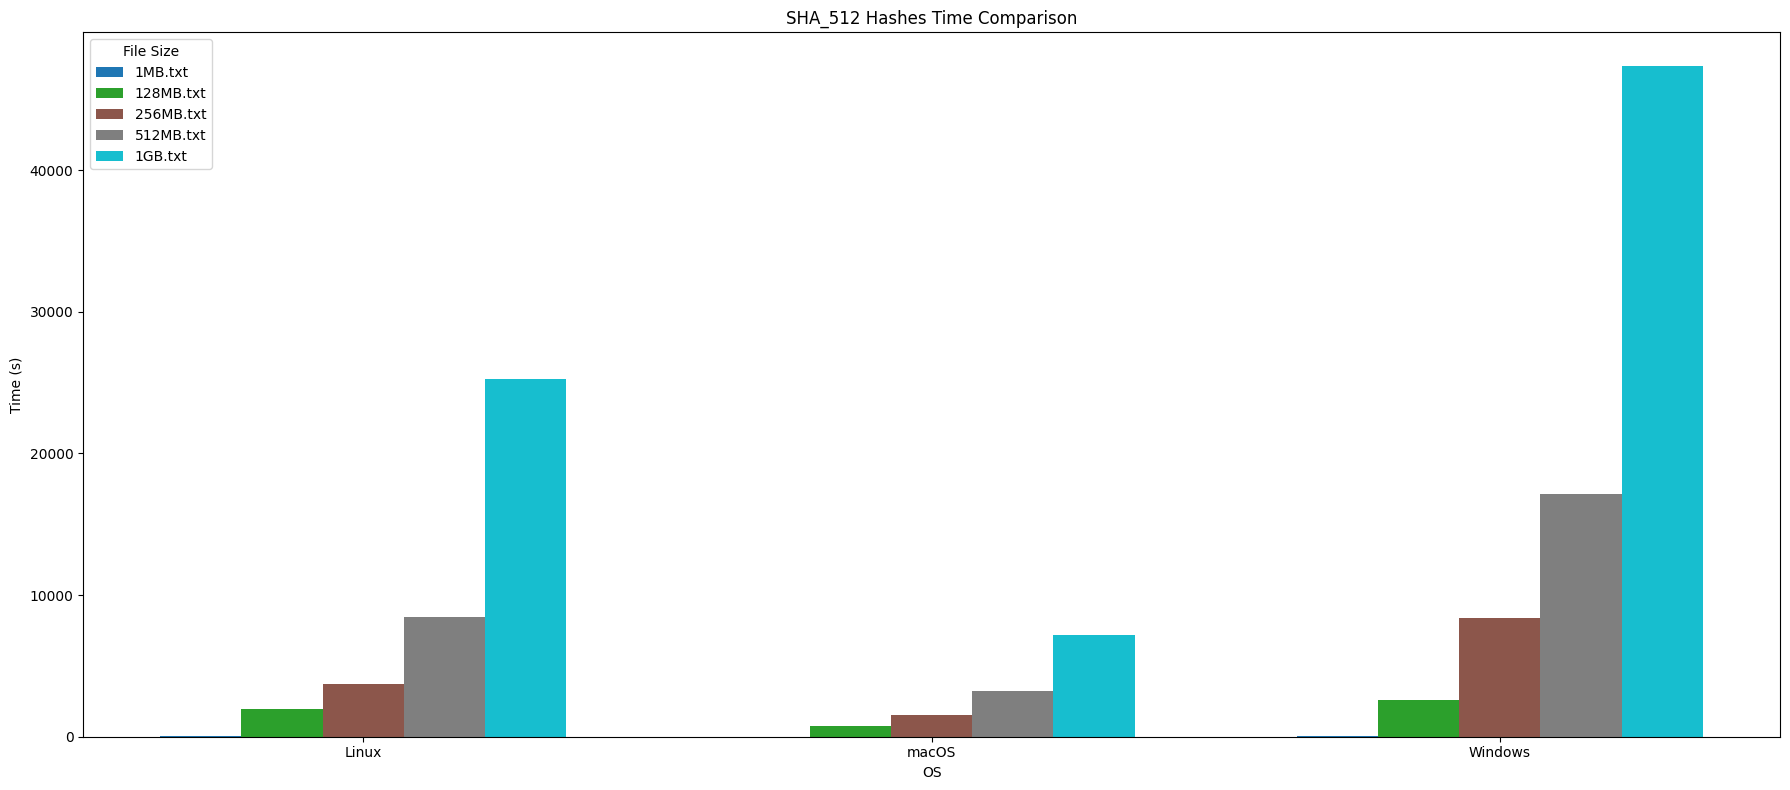

SHA3_224 Results:
Algorithm      OS      File  Hashes_mean
 SHA3_224   Linux   1MB.txt       15.229
 SHA3_224   Linux 128MB.txt     1904.379
 SHA3_224   Linux 256MB.txt     4067.334
 SHA3_224   Linux 512MB.txt     7899.868
 SHA3_224   Linux   1GB.txt    25947.014
 SHA3_224   macOS   1MB.txt        8.105
 SHA3_224   macOS 128MB.txt      701.007
 SHA3_224   macOS 256MB.txt     1448.720
 SHA3_224   macOS 512MB.txt     3033.958
 SHA3_224   macOS   1GB.txt     6547.456
 SHA3_224 Windows   1MB.txt       44.782
 SHA3_224 Windows 128MB.txt     3236.513
 SHA3_224 Windows 256MB.txt     6023.234
 SHA3_224 Windows 512MB.txt    14452.976
 SHA3_224 Windows   1GB.txt    32143.246



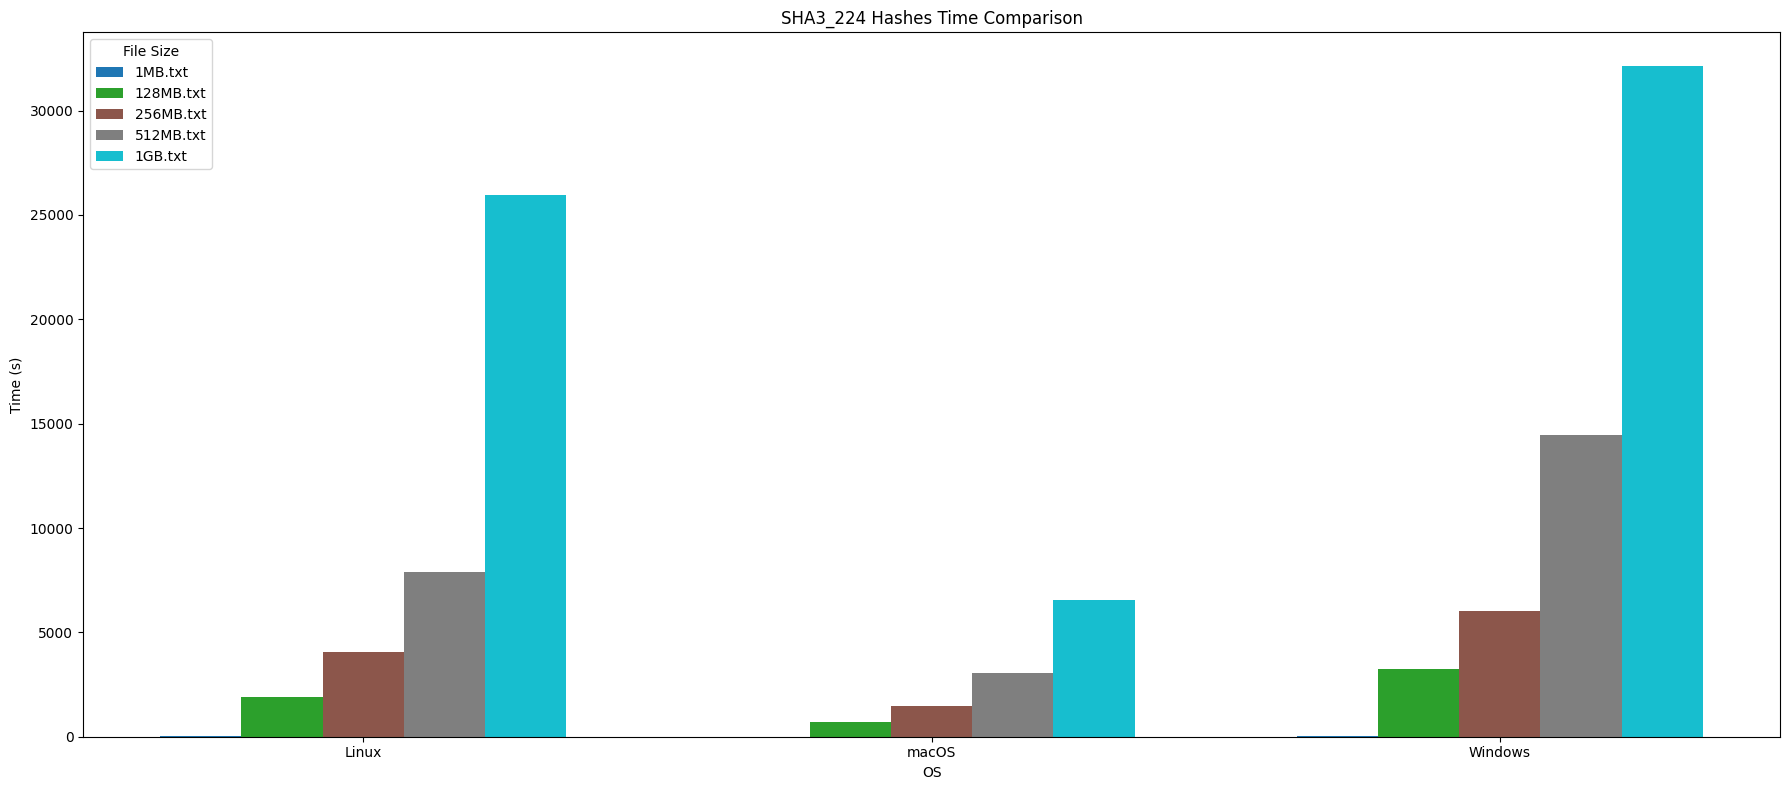

SHA3_256 Results:
Algorithm      OS      File  Hashes_mean
 SHA3_256   Linux   1MB.txt       15.256
 SHA3_256   Linux 128MB.txt     1947.085
 SHA3_256   Linux 256MB.txt     3593.704
 SHA3_256   Linux 512MB.txt     7819.240
 SHA3_256   Linux   1GB.txt    24787.704
 SHA3_256   macOS   1MB.txt        8.340
 SHA3_256   macOS 128MB.txt      737.031
 SHA3_256   macOS 256MB.txt     1478.542
 SHA3_256   macOS 512MB.txt     3165.886
 SHA3_256   macOS   1GB.txt     6741.554
 SHA3_256 Windows   1MB.txt       28.480
 SHA3_256 Windows 128MB.txt     2323.125
 SHA3_256 Windows 256MB.txt     4854.378
 SHA3_256 Windows 512MB.txt    12339.293
 SHA3_256 Windows   1GB.txt    37645.120



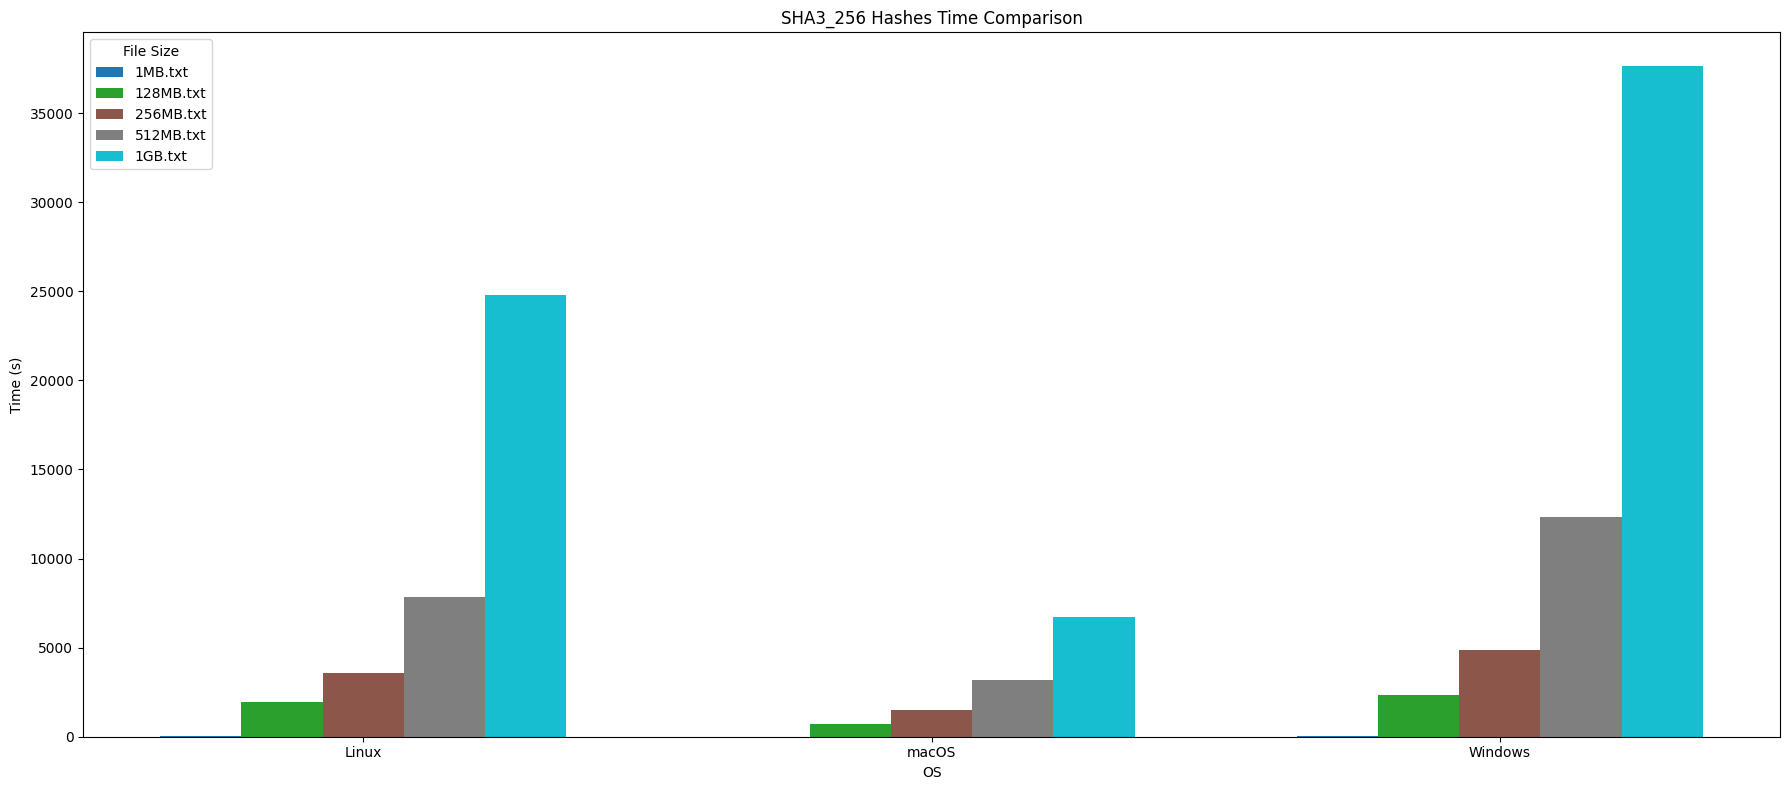

SHA3_384 Results:
Algorithm      OS      File  Hashes_mean
 SHA3_384   Linux   1MB.txt       19.140
 SHA3_384   Linux 128MB.txt     1888.384
 SHA3_384   Linux 256MB.txt     3822.059
 SHA3_384   Linux 512MB.txt     8239.696
 SHA3_384   Linux   1GB.txt    23851.026
 SHA3_384   macOS   1MB.txt        8.489
 SHA3_384   macOS 128MB.txt      811.146
 SHA3_384   macOS 256MB.txt     1622.060
 SHA3_384   macOS 512MB.txt     3401.734
 SHA3_384   macOS   1GB.txt     7372.462
 SHA3_384 Windows   1MB.txt       91.647
 SHA3_384 Windows 128MB.txt     2779.569
 SHA3_384 Windows 256MB.txt     7040.928
 SHA3_384 Windows 512MB.txt    13327.062
 SHA3_384 Windows   1GB.txt    34223.414



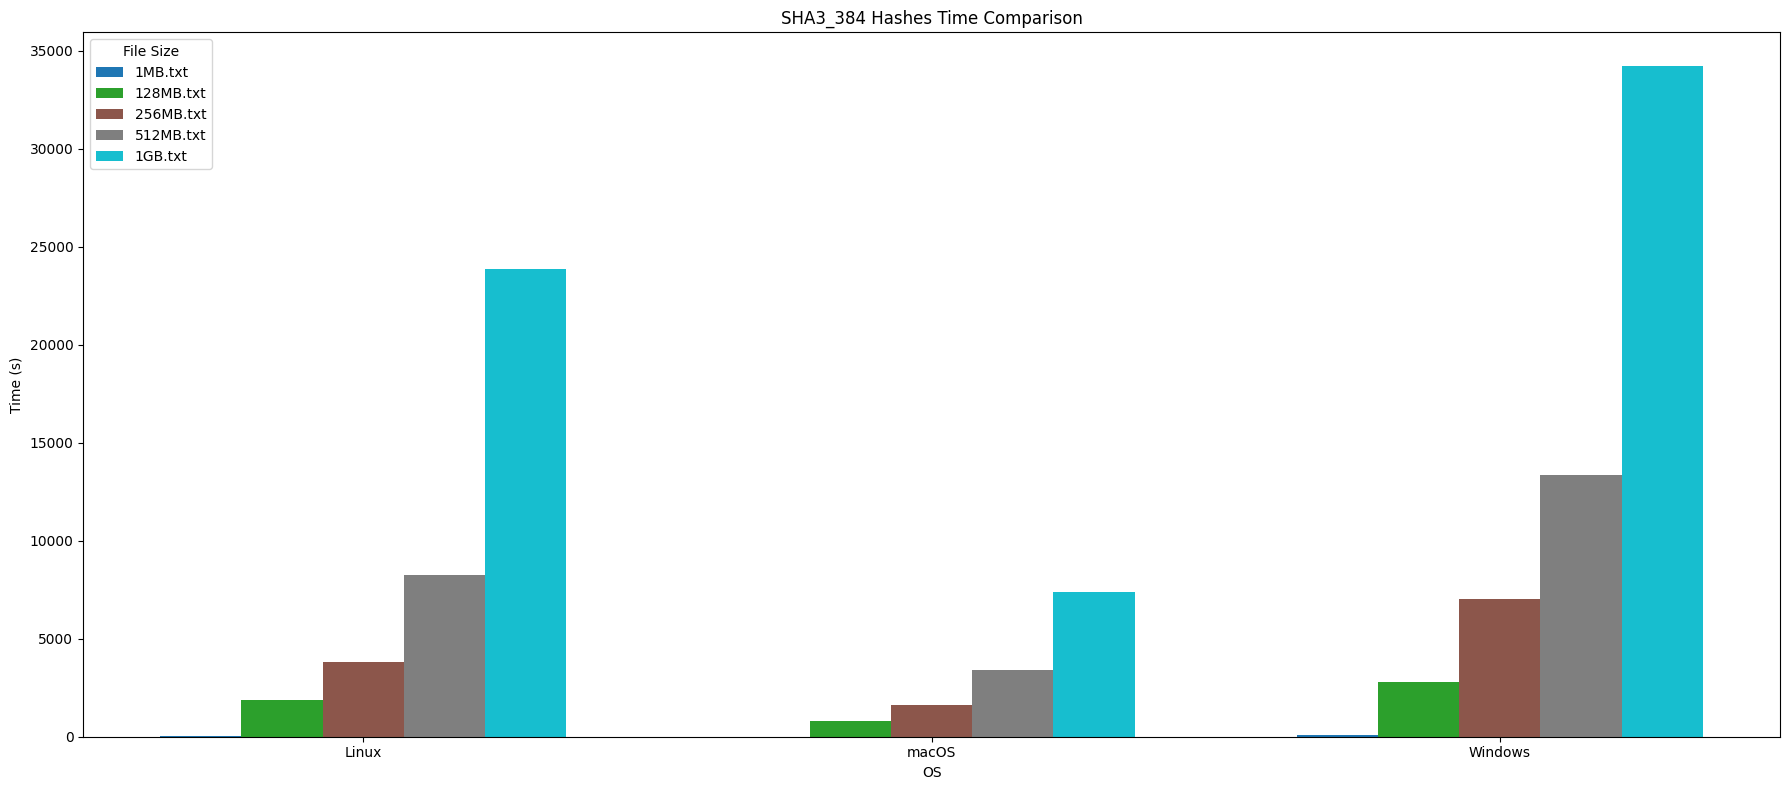

SHA3_512 Results:
Algorithm      OS      File  Hashes_mean
 SHA3_512   Linux   1MB.txt       18.020
 SHA3_512   Linux 128MB.txt     2098.999
 SHA3_512   Linux 256MB.txt     4085.737
 SHA3_512   Linux 512MB.txt     8959.649
 SHA3_512   Linux   1GB.txt    23802.103
 SHA3_512   macOS   1MB.txt        9.825
 SHA3_512   macOS 128MB.txt      949.416
 SHA3_512   macOS 256MB.txt     1884.840
 SHA3_512   macOS 512MB.txt     3951.955
 SHA3_512   macOS   1GB.txt     8472.205
 SHA3_512 Windows   1MB.txt       78.157
 SHA3_512 Windows 128MB.txt     2814.647
 SHA3_512 Windows 256MB.txt     6155.643
 SHA3_512 Windows 512MB.txt    16861.408
 SHA3_512 Windows   1GB.txt    35662.452



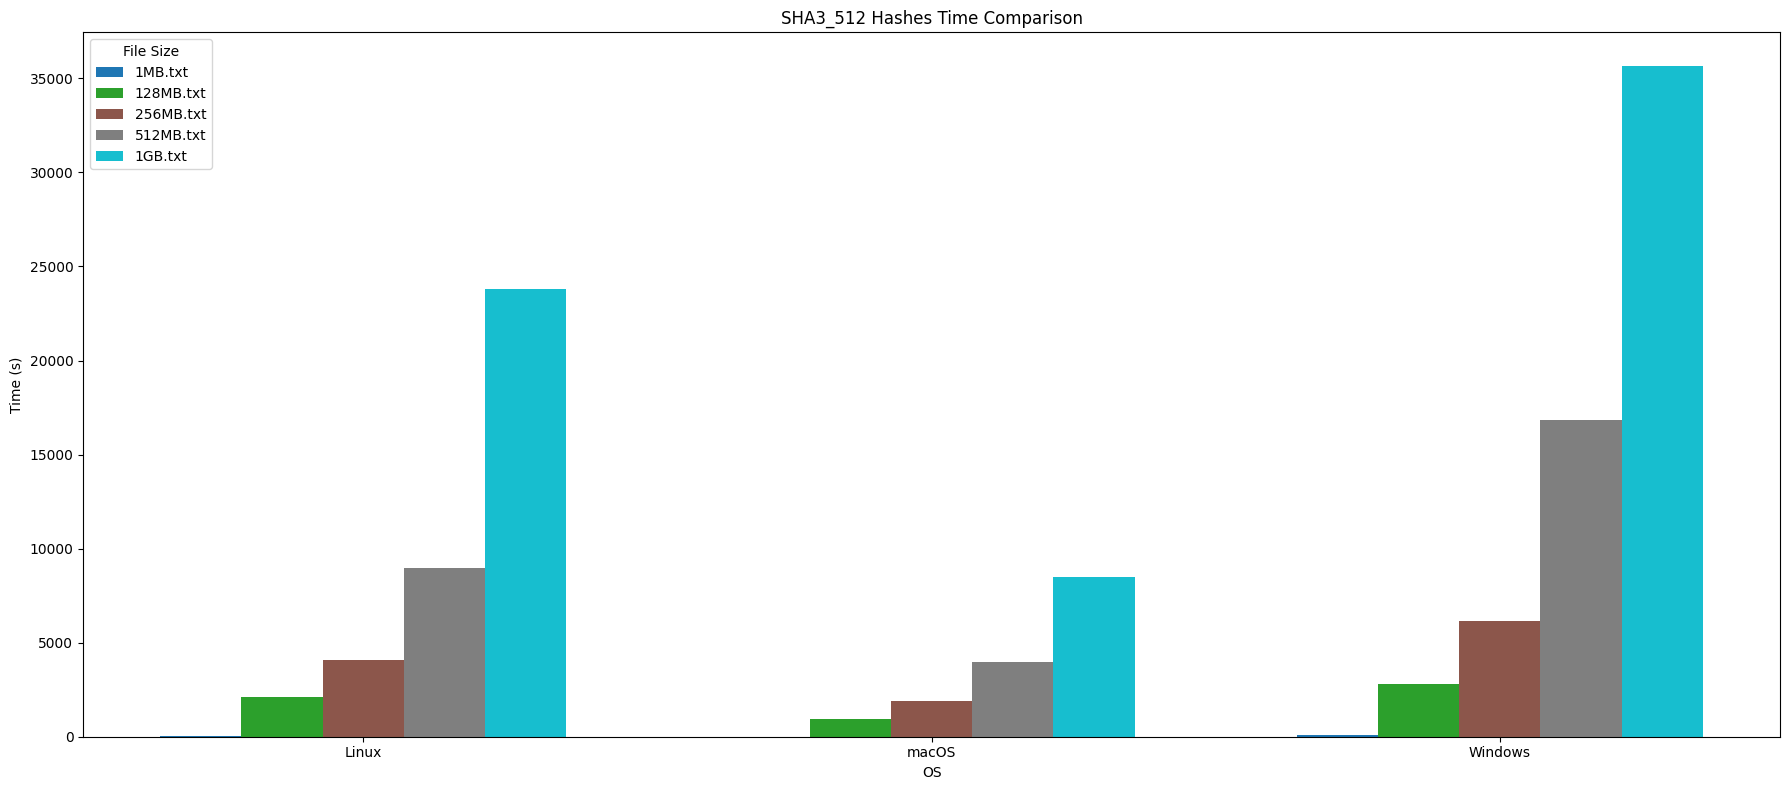

SHAKE128 Results:
Algorithm      OS      File  Hashes_mean
 SHAKE128   Linux   1MB.txt       15.107
 SHAKE128   Linux 128MB.txt     1838.470
 SHAKE128   Linux 256MB.txt     3550.473
 SHAKE128   Linux 512MB.txt     7438.861
 SHAKE128   Linux   1GB.txt    22434.433
 SHAKE128   macOS   1MB.txt        7.737
 SHAKE128   macOS 128MB.txt      682.606
 SHAKE128   macOS 256MB.txt     1354.198
 SHAKE128   macOS 512MB.txt     2947.605
 SHAKE128   macOS   1GB.txt     6408.623
 SHAKE128 Windows   1MB.txt       54.080
 SHAKE128 Windows 128MB.txt     2812.712
 SHAKE128 Windows 256MB.txt     6275.754
 SHAKE128 Windows 512MB.txt    12967.962
 SHAKE128 Windows   1GB.txt    31567.277



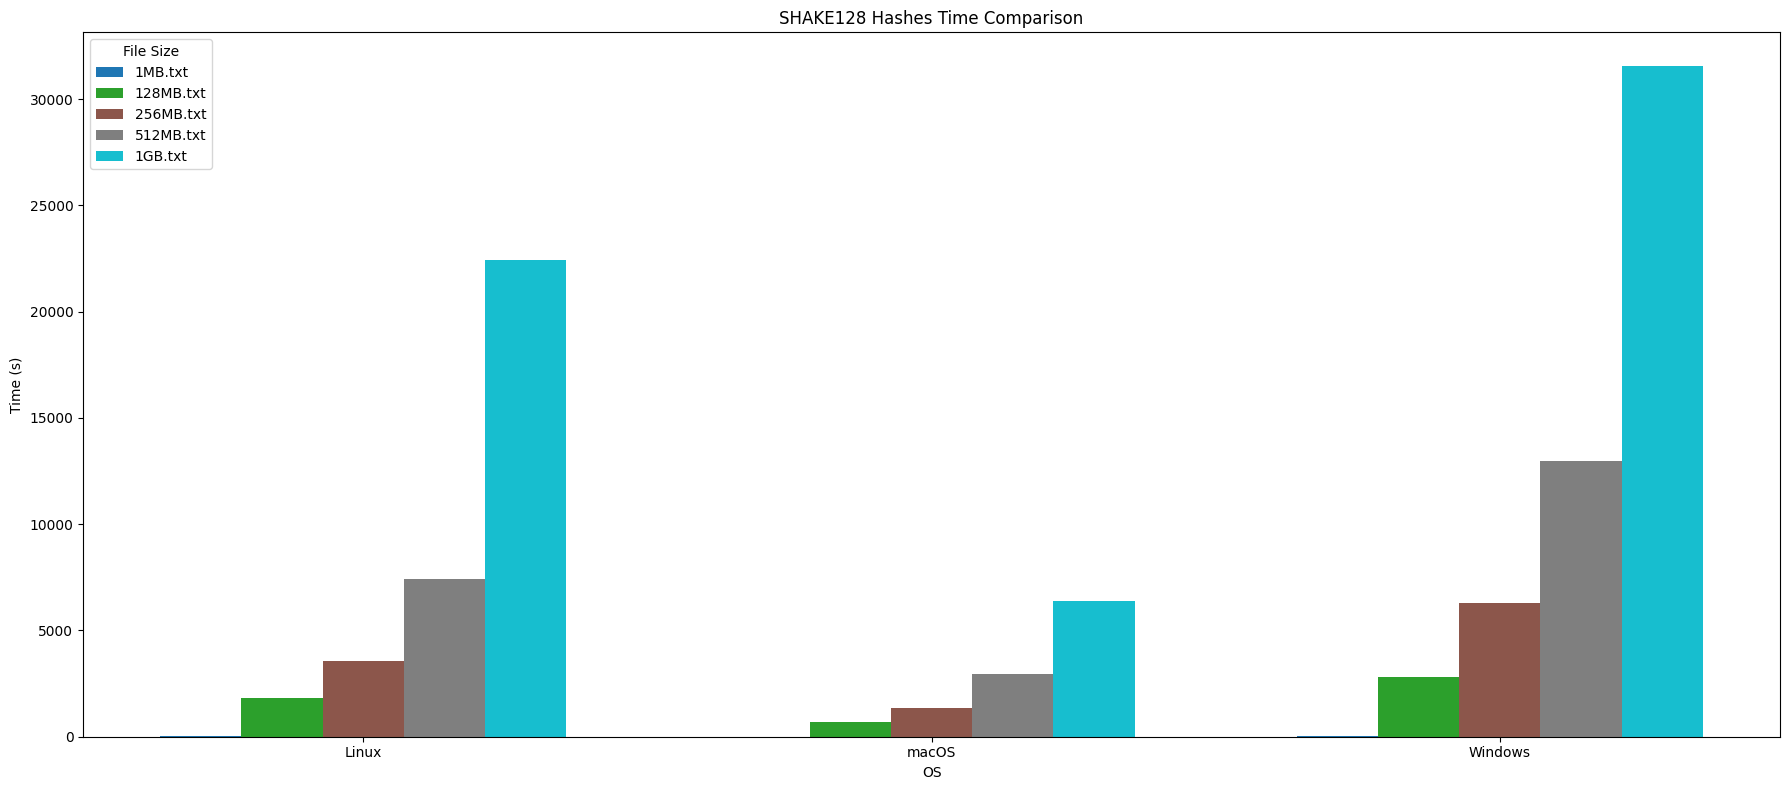

SHAKE256 Results:
Algorithm      OS      File  Hashes_mean
 SHAKE256   Linux   1MB.txt       14.838
 SHAKE256   Linux 128MB.txt     1828.092
 SHAKE256   Linux 256MB.txt     3949.792
 SHAKE256   Linux 512MB.txt     9581.485
 SHAKE256   Linux   1GB.txt    23352.628
 SHAKE256   macOS   1MB.txt        8.306
 SHAKE256   macOS 128MB.txt      718.898
 SHAKE256   macOS 256MB.txt     1500.900
 SHAKE256   macOS 512MB.txt     3149.664
 SHAKE256   macOS   1GB.txt     6527.109
 SHAKE256 Windows   1MB.txt       49.910
 SHAKE256 Windows 128MB.txt     2865.933
 SHAKE256 Windows 256MB.txt     6025.094
 SHAKE256 Windows 512MB.txt    11956.503
 SHAKE256 Windows   1GB.txt    27505.346



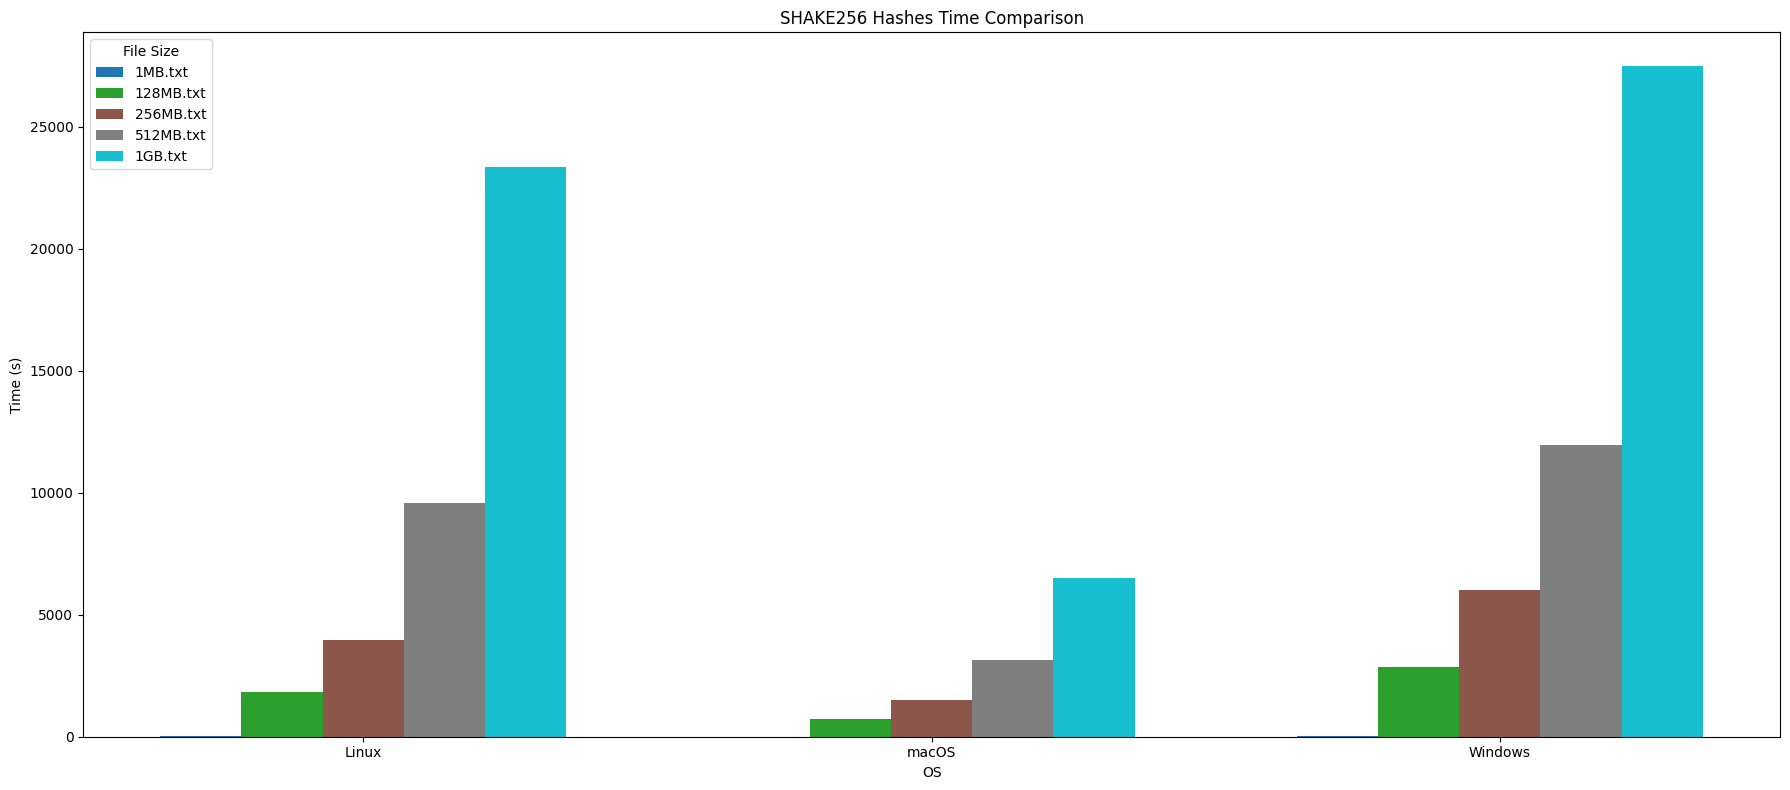

In [6]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm as cm

# CSV files containing the results of the HASHES tests
files = {
    'HASHES_Linux': './HASHES_Linux.csv',
    'HASHES_macOS': './HASHES_macOS.csv',
    'HASHES_Windows': './HASHES_Windows.csv',
}

# List of algorithms and input files
algorithms = ["SHA_224", "SHA_256", "SHA_384", "SHA_512", "SHA3_224", "SHA3_256", "SHA3_384", "SHA3_512", "SHAKE128", "SHAKE256"]
input_files = ["1MB.txt", "128MB.txt", "256MB.txt", "512MB.txt", "1GB.txt"]

# Initialize a DataFrame to store the results
results_list = []

# Read the results from the CSV files
for label, file_path in files.items():
    if os.path.exists(file_path) and os.path.getsize(file_path) > 0:
        df = pd.read_csv(file_path)
        os_name = label.split('_')[1]

        for alg in algorithms:
            for file in input_files:
                alg_df = df[(df['Algorithm'] == alg) & (df['File'] == file)]
                if not alg_df.empty:
                    hashes_mean = alg_df['Time'].mean()
                    results_list.append({'Algorithm': alg, 'OS': os_name, 'File': file, 'Hashes_mean': hashes_mean})

# Convert the results list to a DataFrame
results_df = pd.DataFrame(results_list)

# Plot function
def plot_results(df, algorithm, title):
    if df.empty:
        print(f"No data available for {algorithm}.")
        return

    print(f"{algorithm} Results:")
    print(df.to_string(index=False, float_format="{:.3f}".format))
    print()

    fig, ax = plt.subplots(figsize=(18, 8))
    width = 0.15  # Width of the bars
    os_list = df['OS'].unique()
    x = np.arange(len(os_list)) * (len(input_files) + 2) * width  # Increase spacing between groups

    colors = cm.tab10(np.linspace(0, 1, len(input_files)))

    for j, file in enumerate(input_files):
        file_data = df[df['File'] == file]
        if not file_data.empty:
            y = [file_data[file_data['OS'] == os_name]['Hashes_mean'].values[0] if not file_data[file_data['OS'] == os_name].empty else 0 for os_name in os_list]
            ax.bar(x + width * j, y, width, label=f'{file}', color=colors[j])

    ax.set_xlabel('OS')
    ax.set_ylabel('Time (s)')
    ax.set_title(title)
    ax.set_xticks(x + width * (len(input_files) - 1) / 2)
    ax.set_xticklabels(os_list)
    ax.legend(title='File Size')

    plt.tight_layout()
    plt.show()

# Plot the results for each algorithm
for alg in algorithms:
    alg_df = results_df[results_df['Algorithm'] == alg]
    plot_results(alg_df, alg, f'{alg} Hashes Time Comparison')


# Compare the results of the different OS

Linux Results:
Algorithm    OS      File  Hashes_mean
  SHA_224 Linux   1MB.txt       19.545
  SHA_224 Linux 128MB.txt     2001.504
  SHA_224 Linux 256MB.txt     3604.652
  SHA_224 Linux 512MB.txt     7708.738
  SHA_224 Linux   1GB.txt    20529.077
  SHA_256 Linux   1MB.txt       12.618
  SHA_256 Linux 128MB.txt     1703.131
  SHA_256 Linux 256MB.txt     3486.865
  SHA_256 Linux 512MB.txt     7864.551
  SHA_256 Linux   1GB.txt    26487.313
  SHA_384 Linux   1MB.txt       18.936
  SHA_384 Linux 128MB.txt     2066.204
  SHA_384 Linux 256MB.txt     4036.093
  SHA_384 Linux 512MB.txt     9767.283
  SHA_384 Linux   1GB.txt    23964.939
  SHA_512 Linux   1MB.txt       16.496
  SHA_512 Linux 128MB.txt     1966.837
  SHA_512 Linux 256MB.txt     3706.772
  SHA_512 Linux 512MB.txt     8482.769
  SHA_512 Linux   1GB.txt    25223.064
 SHA3_224 Linux   1MB.txt       15.229
 SHA3_224 Linux 128MB.txt     1904.379
 SHA3_224 Linux 256MB.txt     4067.334
 SHA3_224 Linux 512MB.txt     7899.868
 SHA3_224 

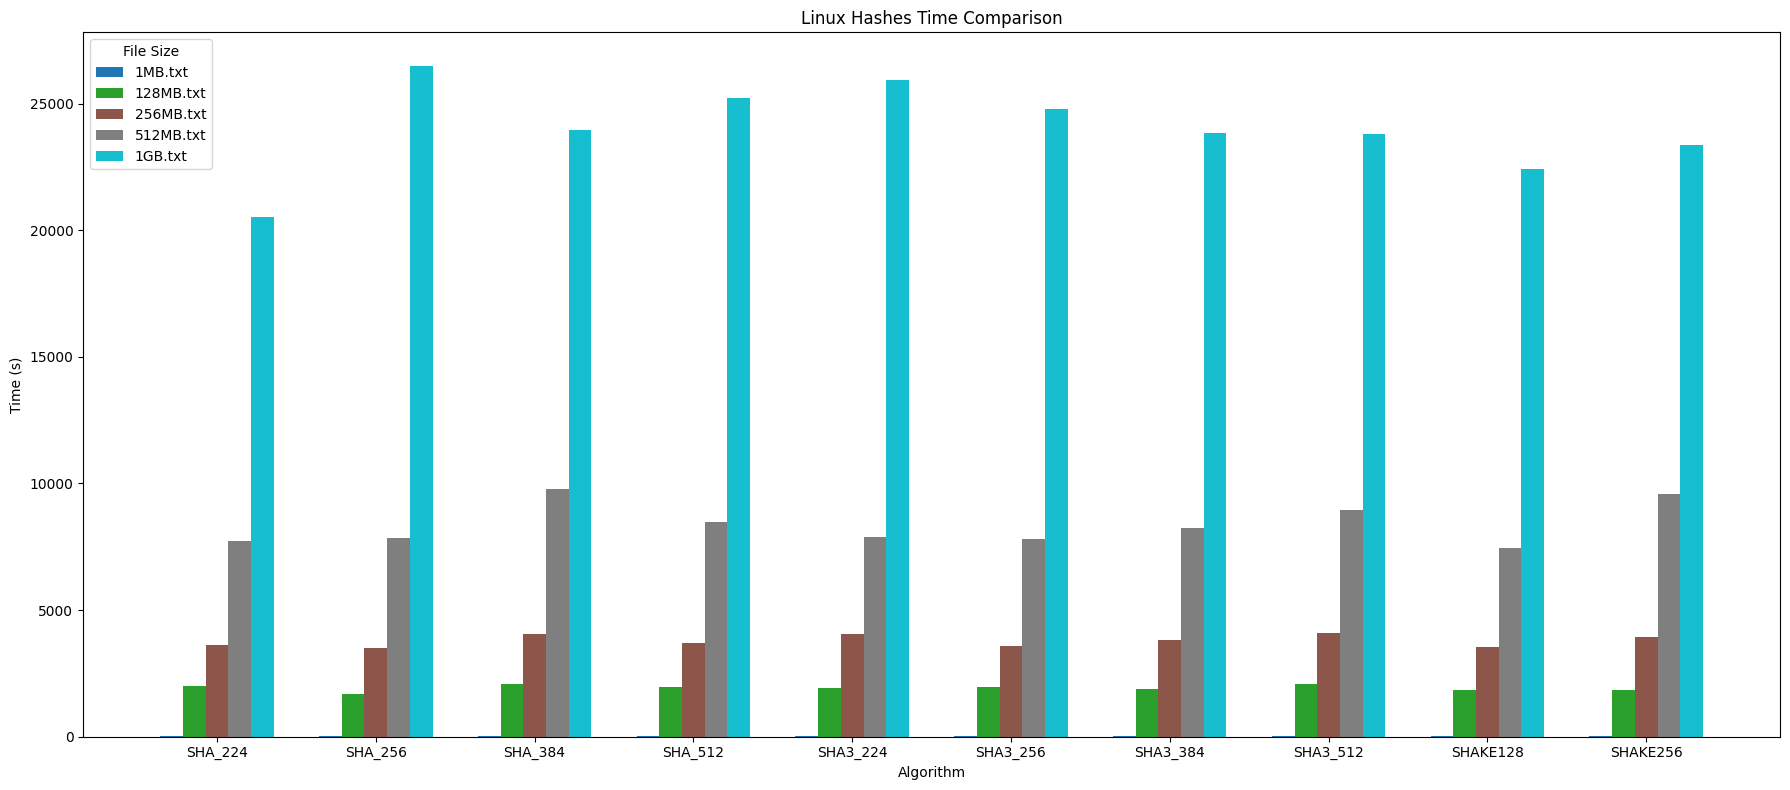

macOS Results:
Algorithm    OS      File  Hashes_mean
  SHA_224 macOS   1MB.txt       10.210
  SHA_224 macOS 128MB.txt      685.581
  SHA_224 macOS 256MB.txt     1312.584
  SHA_224 macOS 512MB.txt     2558.079
  SHA_224 macOS   1GB.txt     5502.351
  SHA_256 macOS   1MB.txt       15.546
  SHA_256 macOS 128MB.txt      597.229
  SHA_256 macOS 256MB.txt     1136.327
  SHA_256 macOS 512MB.txt     2581.946
  SHA_256 macOS   1GB.txt     5563.693
  SHA_384 macOS   1MB.txt        8.676
  SHA_384 macOS 128MB.txt      782.069
  SHA_384 macOS 256MB.txt     1704.912
  SHA_384 macOS 512MB.txt     3413.875
  SHA_384 macOS   1GB.txt     7414.320
  SHA_512 macOS   1MB.txt        8.711
  SHA_512 macOS 128MB.txt      778.326
  SHA_512 macOS 256MB.txt     1537.318
  SHA_512 macOS 512MB.txt     3222.195
  SHA_512 macOS   1GB.txt     7198.348
 SHA3_224 macOS   1MB.txt        8.105
 SHA3_224 macOS 128MB.txt      701.007
 SHA3_224 macOS 256MB.txt     1448.720
 SHA3_224 macOS 512MB.txt     3033.958
 SHA3_224 

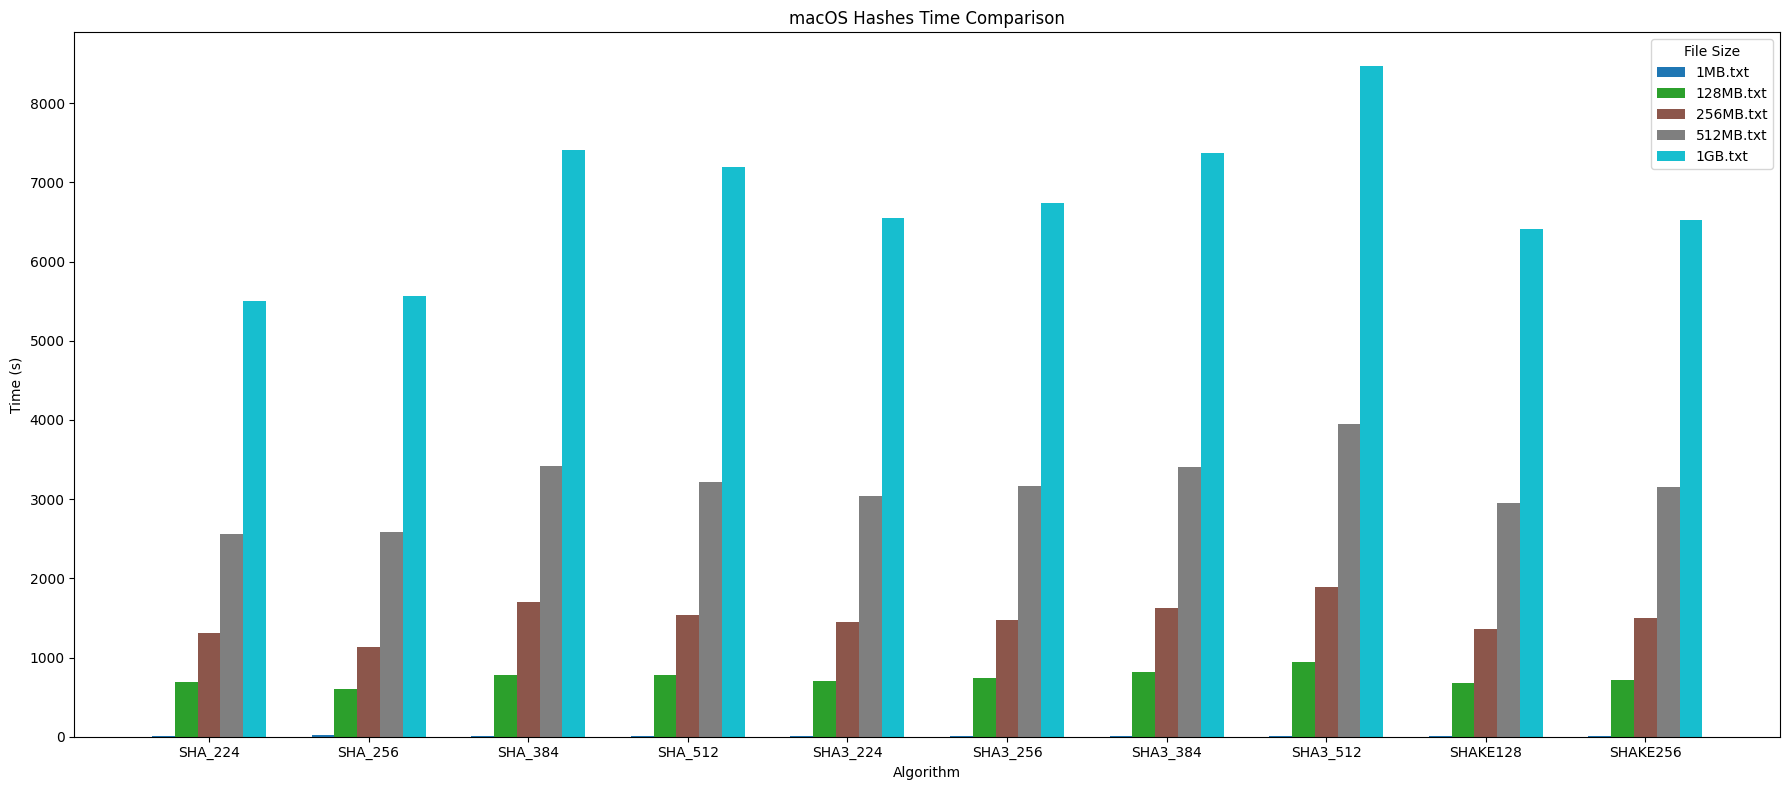

Windows Results:
Algorithm      OS      File  Hashes_mean
  SHA_224 Windows   1MB.txt       40.281
  SHA_224 Windows 128MB.txt     6975.308
  SHA_224 Windows 256MB.txt    12406.888
  SHA_224 Windows 512MB.txt    20552.470
  SHA_224 Windows   1GB.txt    48140.125
  SHA_256 Windows   1MB.txt       44.930
  SHA_256 Windows 128MB.txt     3667.596
  SHA_256 Windows 256MB.txt     8960.458
  SHA_256 Windows 512MB.txt    20700.544
  SHA_256 Windows   1GB.txt    43438.135
  SHA_384 Windows   1MB.txt      240.887
  SHA_384 Windows 128MB.txt     3097.685
  SHA_384 Windows 256MB.txt     8361.366
  SHA_384 Windows 512MB.txt    15840.299
  SHA_384 Windows   1GB.txt    35986.011
  SHA_512 Windows   1MB.txt       24.572
  SHA_512 Windows 128MB.txt     2625.058
  SHA_512 Windows 256MB.txt     8364.163
  SHA_512 Windows 512MB.txt    17152.380
  SHA_512 Windows   1GB.txt    47359.577
 SHA3_224 Windows   1MB.txt       44.782
 SHA3_224 Windows 128MB.txt     3236.513
 SHA3_224 Windows 256MB.txt     6023.234

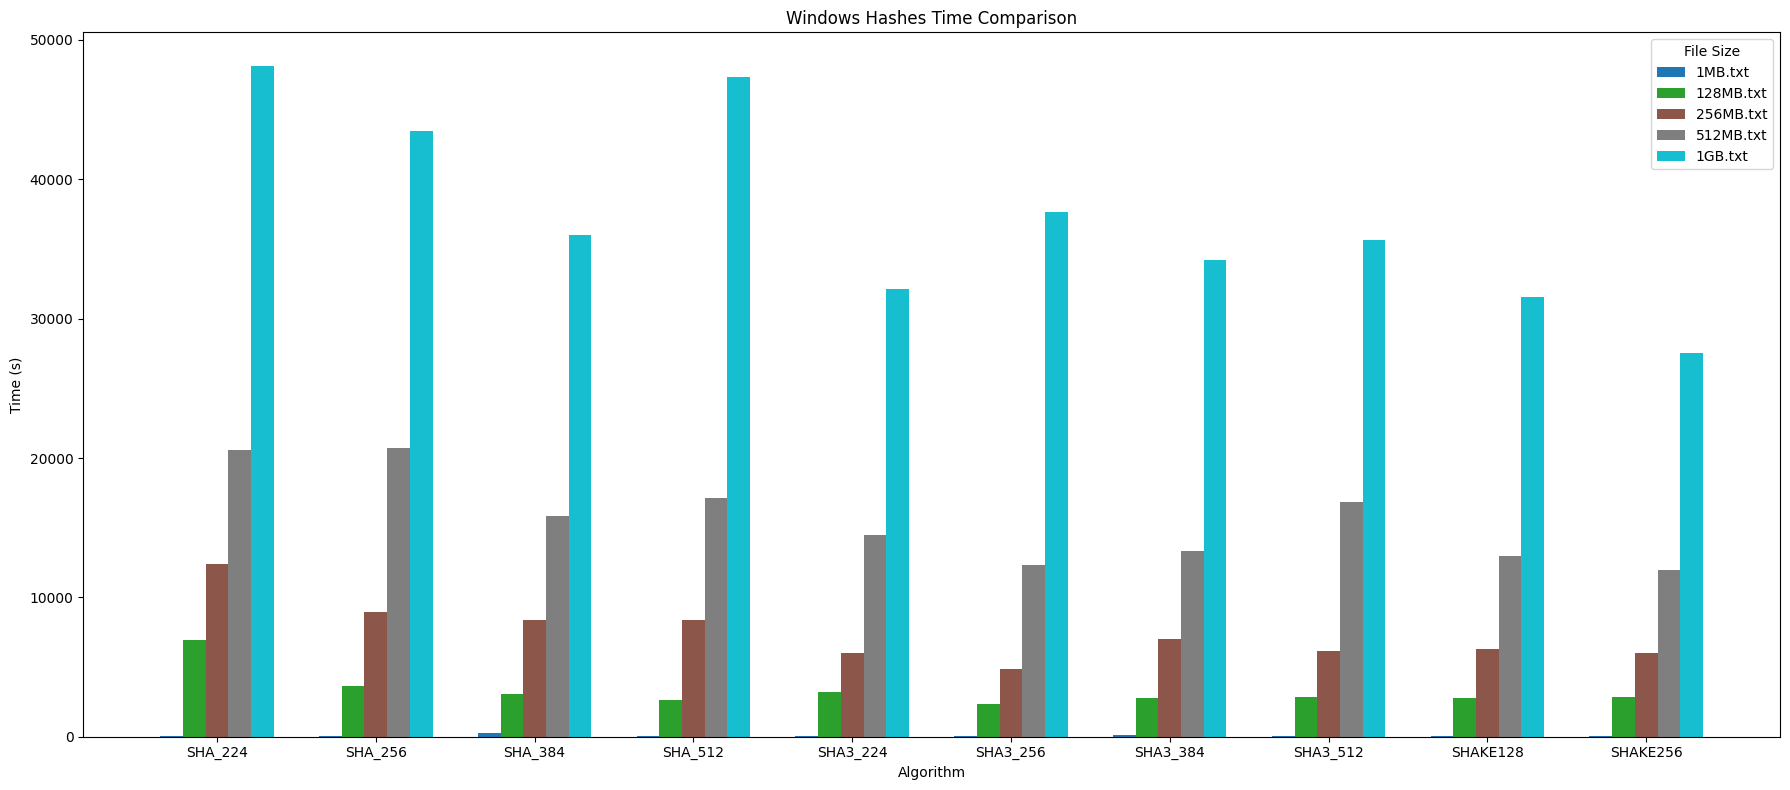

In [6]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm as cm

# CSV files containing the results of the HASHES tests
files = {
    'HASHES_Linux': './HASHES_Linux.csv',
    'HASHES_macOS': './HASHES_macOS.csv',
    'HASHES_Windows': './HASHES_Windows.csv',
}

# List of algorithms and input files
algorithms = ["SHA_224", "SHA_256", "SHA_384", "SHA_512", "SHA3_224", "SHA3_256", "SHA3_384", "SHA3_512", "SHAKE128", "SHAKE256"]
input_files = ["1MB.txt", "128MB.txt", "256MB.txt", "512MB.txt", "1GB.txt"]

# Initialize a DataFrame to store the results
results_list = []

# Read the results from the CSV files
for label, file_path in files.items():
    if os.path.exists(file_path) and os.path.getsize(file_path) > 0:
        df = pd.read_csv(file_path)
        os_name = label.split('_')[1]

        for alg in algorithms:
            for file in input_files:
                alg_df = df[(df['Algorithm'] == alg) & (df['File'] == file)]
                if not alg_df.empty:
                    hashes_mean = alg_df['Time'].mean()
                    results_list.append({'Algorithm': alg, 'OS': os_name, 'File': file, 'Hashes_mean': hashes_mean})

# Convert the results list to a DataFrame
results_df = pd.DataFrame(results_list)

# Plot function for each OS
def plot_results(df, os_name, title):
    if df.empty:
        print(f"No data available for {os_name}.")
        return

    print(f"{os_name} Results:")
    print(df.to_string(index=False, float_format="{:.3f}".format))
    print()

    fig, ax = plt.subplots(figsize=(18, 8))
    width = 0.15  # Width of the bars
    alg_list = df['Algorithm'].unique()
    x = np.arange(len(alg_list)) * (len(input_files) + 2) * width  # Increase spacing between groups

    colors = cm.tab10(np.linspace(0, 1, len(input_files)))

    for j, file in enumerate(input_files):
        file_data = df[df['File'] == file]
        if not file_data.empty:
            y = [file_data[file_data['Algorithm'] == alg]['Hashes_mean'].values[0] if not file_data[file_data['Algorithm'] == alg].empty else 0 for alg in alg_list]
            ax.bar(x + width * j, y, width, label=f'{file}', color=colors[j])

    ax.set_xlabel('Algorithm')
    ax.set_ylabel('Time (s)')
    ax.set_title(title)
    ax.set_xticks(x + width * (len(input_files) - 1) / 2)
    ax.set_xticklabels(alg_list)
    ax.legend(title='File Size')

    plt.tight_layout()
    plt.show()

# Plot the results for each OS
for os_name in ['Linux', 'macOS', 'Windows']:
    os_df = results_df[results_df['OS'] == os_name]
    plot_results(os_df, os_name, f'{os_name} Hashes Time Comparison')
